# Predicting used phone and tablet prices using regression

## Import Libraries

In [108]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

## Import Data

In [109]:
database = pd.read_csv('used_device_data.csv')

In [110]:
np.random.seed(0) 

## Understanding the Data

In [111]:
database.shape

(3454, 15)

In [112]:
database.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [113]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [114]:
database.head(5)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Missing Values

In [115]:
#After understanding the database structure better, we check null values
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
rear_camera_mp,179,5.2
weight,7,0.2
battery,6,0.2
internal_memory,4,0.1
ram,4,0.1
front_camera_mp,2,0.1
device_brand,0,0.0
os,0,0.0
screen_size,0,0.0
4g,0,0.0


In [116]:
#We will be droping some columns that we won't be using
database.drop(['rear_camera_mp', 'front_camera_mp'], axis = 1, inplace = True)

In [117]:
database.shape

(3454, 13)

In [118]:
#Finally, we will check in case there are some duplicated rows.
database.duplicated().sum()

0

In [119]:
#We drop the duplicates and keep one of each 
database = database.drop_duplicates(keep='first')

## Visualization

array([[<Axes: title={'center': 'screen_size'}>,
        <Axes: title={'center': 'internal_memory'}>,
        <Axes: title={'center': 'ram'}>],
       [<Axes: title={'center': 'battery'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'release_year'}>],
       [<Axes: title={'center': 'days_used'}>,
        <Axes: title={'center': 'normalized_used_price'}>,
        <Axes: title={'center': 'normalized_new_price'}>]], dtype=object)

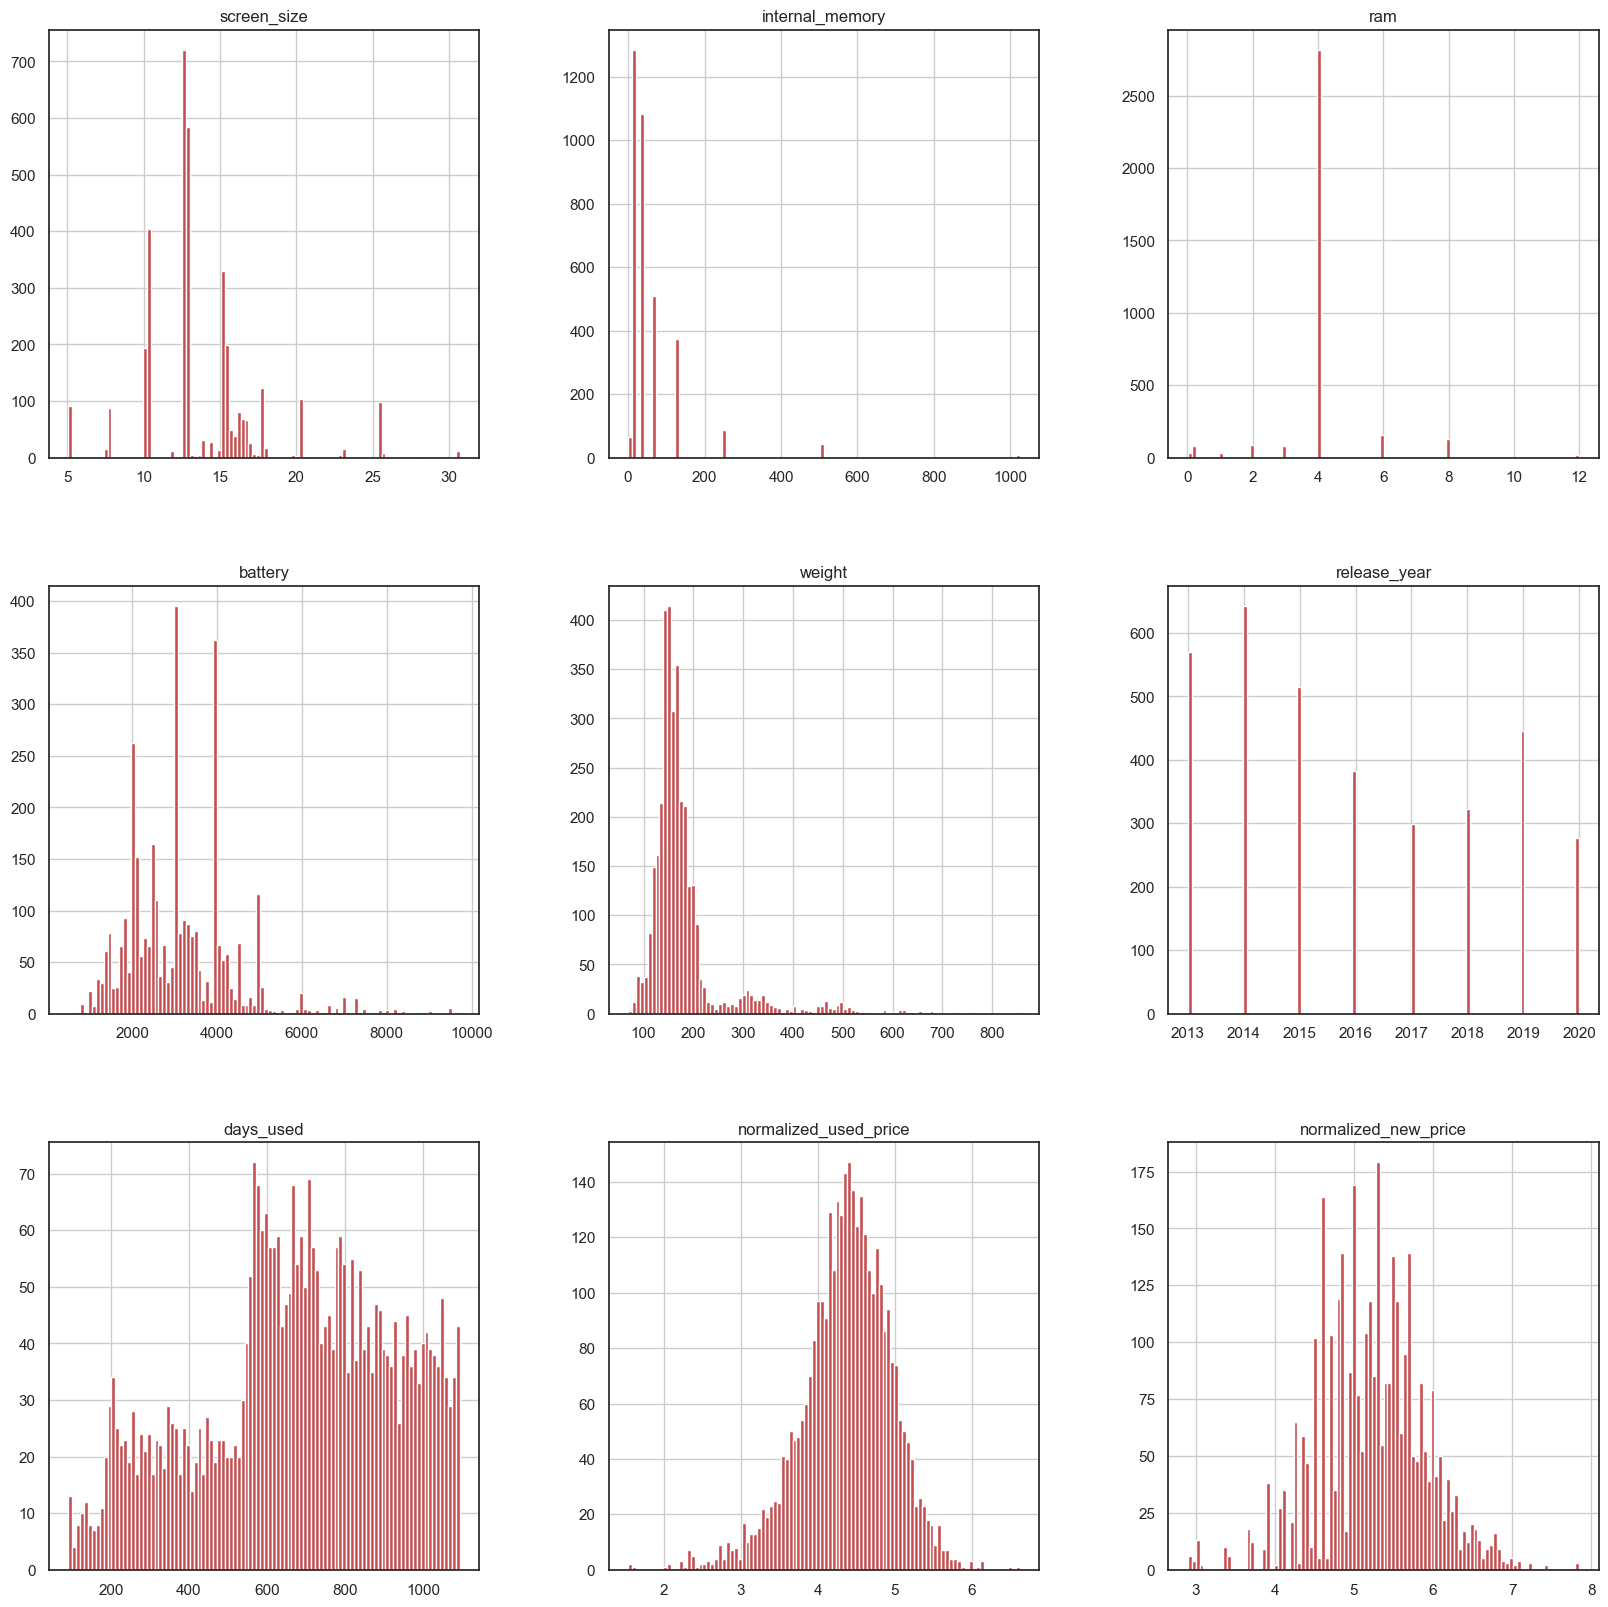

In [120]:
#We check the distribution of some features in our database
database.hist(bins= 100, figsize = (20,20), color = 'r')

<Axes: xlabel='os', ylabel='count'>

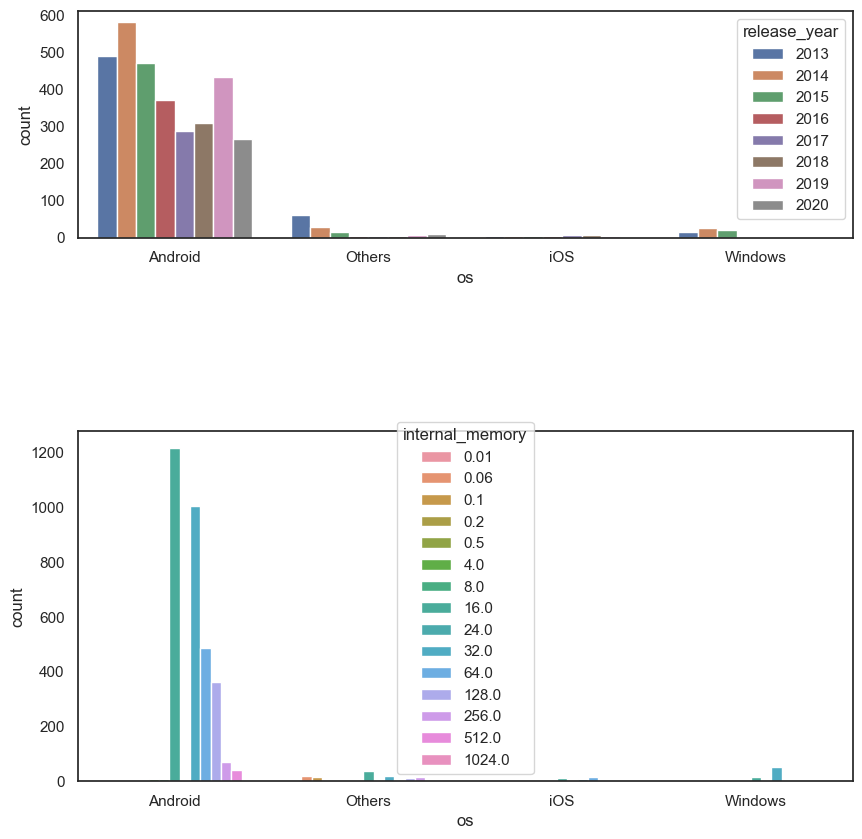

In [121]:
plt.figure(figsize=[10,10])
plt.subplot(311)
sns.countplot(x = 'os', hue = 'release_year', data = database)
plt.subplot(212)
sns.countplot(x = 'os', hue = 'internal_memory', data = database)

## Feature Engineering

In [122]:
#Drop the rows where at least one element is missing.
# database.dropna()
database = database.dropna(axis = 0, how ='any') 

## Categorical Variable Encoding

In [123]:
database.shape

(3434, 13)

In [124]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3434 entries, 0 to 3453
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3434 non-null   object 
 1   os                     3434 non-null   object 
 2   screen_size            3434 non-null   float64
 3   4g                     3434 non-null   object 
 4   5g                     3434 non-null   object 
 5   internal_memory        3434 non-null   float64
 6   ram                    3434 non-null   float64
 7   battery                3434 non-null   float64
 8   weight                 3434 non-null   float64
 9   release_year           3434 non-null   int64  
 10  days_used              3434 non-null   int64  
 11  normalized_used_price  3434 non-null   float64
 12  normalized_new_price   3434 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 375.6+ KB


In [125]:
#We have 13 columns. Out of those, 4 columns are categorical. 
# Apply the Label encoder to each categorical feature 
from sklearn.preprocessing import LabelEncoder 
cat_features = ['device_brand', 'os', '4g', '5g'] 
encoder = LabelEncoder() 
encoded = database[cat_features].apply(encoder.fit_transform)
database.drop(cat_features, axis=1, inplace=True)
database = pd.concat([encoded,database],axis = 1) 
database.head(1)

,device_brand,os,4g,5g,screen_size,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,10,0,1,0,14.5,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.7151


## Correlations

<Axes: >

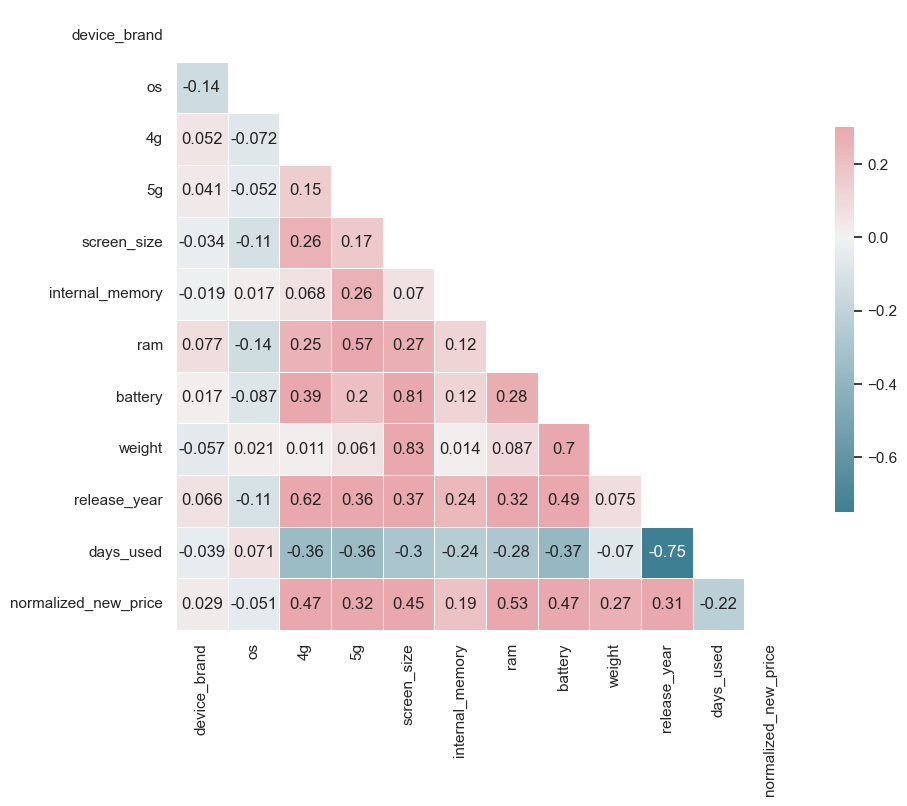

In [126]:
#We check high correlated features with the Correlation Matrix
#If there are none, we leave the database as it is
sns.set(style="white")
corr = database.drop(columns = ['normalized_used_price']).corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot = True)

In [127]:
#Drop days_used because it is so strongly negatively correlated with release_year
database.drop(['days_used'], axis = 1, inplace = True)

## Splitting into Train and Test Set

In [128]:
database.columns

Index(['device_brand', 'os', '4g', '5g', 'screen_size', 'internal_memory',
       'ram', 'battery', 'weight', 'release_year', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [129]:
#First, we change the order of the features and we put the depedent variable at the end
column_names = ['device_brand', 'os', '4g', '5g', 'screen_size', 'internal_memory',
                'ram', 'battery', 'weight', 'release_year', 'normalized_new_price',
                'normalized_used_price']

database = database.reindex(columns = column_names ) 
database.head(1)

,device_brand,os,4g,5g,screen_size,internal_memory,ram,battery,weight,release_year,normalized_new_price,normalized_used_price
0,10,0,1,0,14.5,64.0,3.0,3020.0,146.0,2020,4.7151,4.307572


In [130]:
#We split into Training and Test Set

X = database.iloc[:,:-1]  #independent columns
y = database.iloc[:,-1]    #target column i.e price range

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scaling

In [131]:
#Now we do some Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test)) #we do the Feature Scaling

X_train2.columns = X_train.columns.values 
X_test2.columns = X_test.columns.values #we give the new Scaled DataFrame column names

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values #we give the new Scaled DataFrame each index

X_train = X_train2
X_test = X_test2

X_train.head(1)

,device_brand,os,4g,5g,screen_size,internal_memory,ram,battery,weight,release_year,normalized_new_price
1574,-0.306264,-0.234702,0.686545,-0.215583,-0.249469,-0.271687,-0.04235,0.669338,-0.309801,-0.420419,1.275047


## Modelling

### Random Forest

In [132]:
#We chose Random Forest algorith for this project
#Let's do Cross Validation to check the overal score in the Training Set
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

scores = []
forest = RandomForestRegressor(n_estimators=20, random_state=0)
acc = cross_val_score(forest, X_train, y_train, scoring='r2', cv=5)
scores.append(round(acc.mean()*100,2))

In [133]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores})
results

,Metrics,Accuracy
0,R2,80.85


### Hyper-parameter tuning

In [134]:
#To improve the performance of the model, we optimise hyper-parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300]}
forest = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [135]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'n_estimators': 300}

In [136]:
scores2 = []
best_grid = grid_search.best_estimator_
acc2 = cross_val_score(best_grid, X_train, y_train, scoring='r2', cv=5)
scores2.append(round(acc2.mean()*100,2))

In [137]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores,
    'Accuracy Tuned Param': scores2})
results

,Metrics,Accuracy,Accuracy Tuned Param
0,R2,80.85,81.58


### Validation

In [138]:
#Finally let's check the performance on the Test Set
from sklearn.metrics import r2_score

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
acc_test = round(r2_score(y_test,y_pred)*100,2)

In [139]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores,
    'Accuracy Tuned Param': scores2,
    'Accuracy Test Set': acc_test})
results

,Metrics,Accuracy,Accuracy Tuned Param,Accuracy Test Set
0,R2,80.85,81.58,85.16


In [140]:
#Other metrics apart from R2 
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 0.18
Mean Squared Error: 0.05
Root Mean Squared Error: 0.23


### Feature Importance

In [141]:
#On to the second goal: feature importance when predicting prices
name = []
importance = []
for nam, imp in zip(X, best_grid.feature_importances_):
    name.append(nam)
    importance.append(round(imp*100,2))

In [142]:
features = pd.DataFrame({'Features': name, "Importance (%)": importance})
features.sort_values(by='Importance (%)', ascending = False)

,Features,Importance (%)
10,normalized_new_price,57.66
4,screen_size,16.78
5,internal_memory,11.78
7,battery,5.27
8,weight,4.24
0,device_brand,1.93
9,release_year,1.35
6,ram,0.49
2,4g,0.30
1,os,0.12


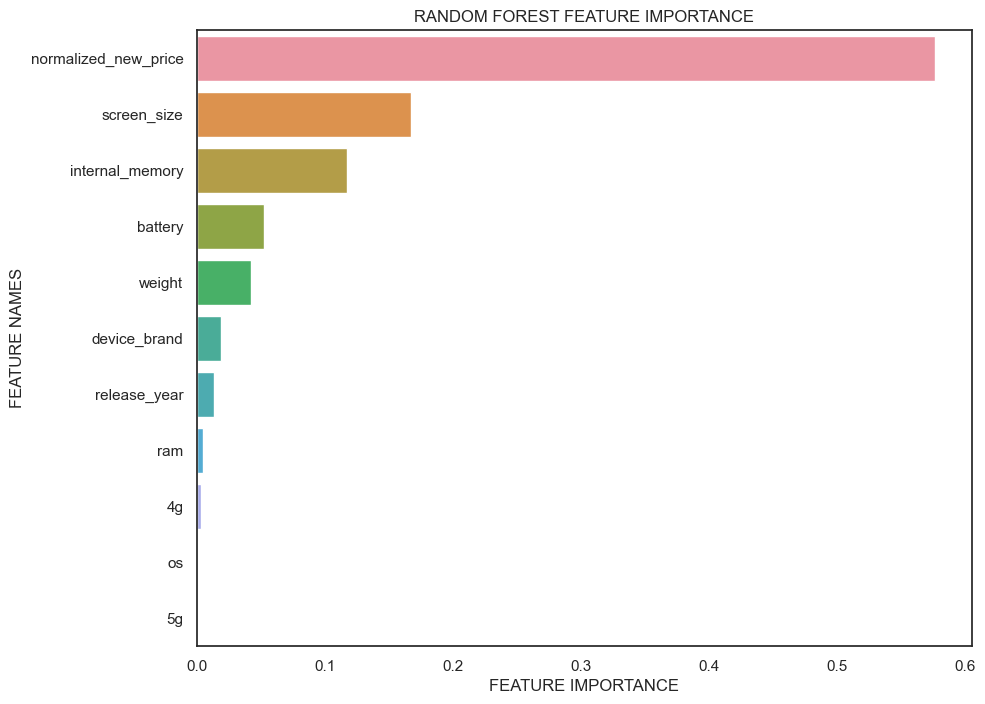

In [143]:
#Finally we plot it 
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


plot_feature_importance(best_grid.feature_importances_,X.columns,'RANDOM FOREST')